In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [204]:
import warnings
warnings.filterwarnings("ignore")

In [205]:
Company = pd.read_csv('Company_Data2015-1.csv')

In [206]:
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,"-7,027.48","-1,007.24","5,936.03",474.3,"-1,076.34",40.5,...,0,0,0,0,0,0,0,45.00,0.00,0
1,21214,Tata Tele. Mah.,-3986.19,"1,954.93","-2,968.08","4,458.20","7,410.18","9,070.86","-1,098.88",486.86,...,-10.3,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,"7,714.68","6,944.54","1,281.54","4,496.25","9,097.64",...,"-5,279.14","-5,516.98","-7,780.25","-7,723.67","-7,961.51",97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.3,-623.49,"2,353.88","2,326.05","1,033.69","-2,612.42","1,034.12",...,-3.33,-7.21,-48.13,-47.7,-51.58,93,63,2.00,0.24,1.9
4,23505,Bharati Defence,-2967.36,50.3,"-1,070.83","4,675.33","5,740.90","1,084.20","1,836.23","4,685.81",...,-295.55,-400.55,-845.88,379.79,274.79,"3,887",346,0.00,0.01,0.05


In [207]:
Company.columns = Company.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [208]:
Company.columns =Company.columns.str.replace('ROG-','ROG_')

In [209]:
Company.columns =Company.columns.str.replace('[','_').str.replace(']','_')

In [210]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
     

In [211]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,"-7,027.48","-1,007.24","5,936.03",474.3,"-1,076.34",40.5,...,0,0,0,0,0,0,0,45.00,0.00,0
1,21214,Tata Tele. Mah.,-3986.19,"1,954.93","-2,968.08","4,458.20","7,410.18","9,070.86","-1,098.88",486.86,...,-10.3,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,"7,714.68","6,944.54","1,281.54","4,496.25","9,097.64",...,"-5,279.14","-5,516.98","-7,780.25","-7,723.67","-7,961.51",97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.3,-623.49,"2,353.88","2,326.05","1,033.69","-2,612.42","1,034.12",...,-3.33,-7.21,-48.13,-47.7,-51.58,93,63,2.00,0.24,1.9
4,23505,Bharati Defence,-2967.36,50.3,"-1,070.83","4,675.33","5,740.90","1,084.20","1,836.23","4,685.81",...,-295.55,-400.55,-845.88,379.79,274.79,"3,887",346,0.00,0.01,0.05


In [212]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [213]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   object 
 4   Networth                             3586 non-null   object 
 5   Capital_Employed                     3586 non-null   object 
 6   Total_Debt                           3586 non-null   object 
 7   Gross_Block                          3586 non-null   object 
 8   Net_Working_Capital                  3586 non-null   object 
 9   Current_Assets                       3586 non-null   object 
 10  Current_Liabilities_and_Provisions   3586 non-null   object 
 11  Total_Assets_by_Liabilities   

In [214]:
Company=Company.drop(['Co_Name','ROG_Net_Worth_perc','Gross_Block','Gross_Sales','Net_Sales','Cost_of_Production','ROG_PBIDT_perc','ROG_PBDT_perc','ROG_PBIT_perc','ROG_PBT_perc','ROG_PAT_perc','ROG_CP_perc','ROG_Revenue_earnings_in_forex_perc', 'ROG_Revenue_expenses_in_forex_perc','ROG_Market_Capitalisation_perc','ROG_Capital_Employed_perc'],axis=1)

In [215]:
Company.shape
print('The number of rows of the dataframe is',Company.shape[0],'.') 
print('The number of columns of the dataframe is',Company.shape[1],'.')

The number of rows of the dataframe is 3586 .
The number of columns of the dataframe is 51 .


In [216]:
pd.options.display.float_format = '{:.2f}'.format   
Company.describe()

,Co_Code,Networth_Next_Year,Total_Asset_Turnover_Ratio_Latest_,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets
count,3586.00,3586.00,3585.00,3483.00,3586.00
mean,16065.39,725.05,1.24,79.64,0.82
std,19776.82,4769.68,2.67,137.85,1.20
min,4.00,-8021.60,0.00,-199.00,-0.33
25%,3029.25,3.98,0.07,0.00,0.07
50%,6077.50,19.02,0.60,35.00,0.48
75%,24269.50,123.80,1.55,96.00,1.16
max,72493.00,111729.10,57.75,996.00,17.63


In [217]:
dups = Company.duplicated()
Company[dups]

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block


In [218]:
Company.dtypes.value_counts()

object     46
float64     4
int64       1
dtype: int64

In [219]:
for column in Company.columns:
    if Company[column].dtype == 'object':
        print(column.upper(),': ',Company[column].nunique())
        print(Company[column].value_counts().sort_values())
        print('\n')


EQUITY_PAID_UP :  2028
93.32     1
29.14     1
19.33     1
14.3      1
46.1      1
         ..
10       27
0.25     30
1        33
5        42
3        51
Name: Equity_Paid_Up, Length: 2028, dtype: int64


NETWORTH :  2981
660.37    1
9.67      1
24.56     1
44.7      1
23.36     1
         ..
0.05      5
1.07      5
3.1       6
0.04      6
4.2       6
Name: Networth, Length: 2981, dtype: int64


CAPITAL_EMPLOYED :  3105
1,036.32    1
2,614.82    1
13.09       1
375.23      1
-5.14       1
           ..
0.06        5
1.84        5
0           5
0.05        6
0.01        9
Name: Capital_Employed, Length: 3105, dtype: int64


TOTAL_DEBT :  2139
166.65      1
125.13      1
86.4        1
27.3        1
49.93       1
         ... 
0.11       13
0.03       15
0.05       15
0.01       26
0         844
Name: Total_Debt, Length: 2139, dtype: int64


NET_WORKING_CAPITAL :  2699
449.08     1
21.81      1
4.29       1
3          1
27.64      1
          ..
0.01      14
0.06      14
0.05      15
0.0

5.81          1
7.64          1
5,207.68      1
3.07          1
7.7           1
           ... 
0.02          9
0.01          9
3             9
2            12
0           745
Name: Debtors_Ratio_Latest_, Length: 1517, dtype: int64


INTEREST_COVER_RATIO_LATEST_ :  1432
-9.43       1
3.58        1
15.44       1
34.6        1
-1.7        1
         ... 
1.4        12
1          14
1.03       14
1.33       14
0        1001
Name: Interest_Cover_Ratio_Latest_, Length: 1432, dtype: int64


PBIDTM_PERC_LATEST_ :  2370
11.92       1
80.26       1
14.15       1
15,640      1
-12.63      1
         ... 
40          7
33.33       7
11.11       9
25         11
0         390
Name: PBIDTM_perc_Latest_, Length: 2370, dtype: int64


PBITM_PERC_LATEST_ :  2312
0.16       1
-28.5      1
-7.46      1
79.73      1
12.66      1
        ... 
3.13       7
1.86       7
33.33      7
11.11     12
0        393
Name: PBITM_perc_Latest_, Length: 2312, dtype: int64


PBDTM_PERC_LATEST_ :  2327
1.61       1
90.31  

In [220]:
cat=[]
num=[]
for i in Company.columns:
    if Company[i].dtype=="object": cat.append(i)
    else:num.append(i) 

    
print("Categorical Columns:",cat)
print("/")
print("Numerical Columns:",num)



Categorical Columns: ['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Net_Working_Capital', 'Current_Assets', 'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities', 'Other_Income', 'Value_Of_Output', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'Current_Ratio_Latest_', 'Fixed_Assets_Ratio_Latest_', 'Inventory_Ratio_Latest_', 'Debtors_Ratio_Latest_', 'Interest_Cover_Ratio_Latest_', 'PBIDTM_perc_Latest_', 'PBITM_perc_Latest_', 'PBDTM_perc_Latest_', 'CPM_perc_Latest_', 'APATM_perc_Latest_', 'Debtor

In [221]:
for feature in Company:
    if Company[feature].dtype == 'object':
        print('\n') 
        print('feature:',feature)
        print(pd.Categorical(Company[feature].unique())) 
        print(pd.Categorical(Company[feature].unique()).codes) 
        Company[feature] = pd.Categorical(Company[feature]).codes



feature: Equity_Paid_Up
['419.36', '1,954.93', '53.84', '157.3', '50.3', ..., '501.3', '296.5', '2,427.95', '8,245.46', '1,998.70']
Length: 2028
Categories (2028, object): ['0', '0.01', '0.02', '0.04', ..., '98.43', '98.95', '987.46', '99.68']
[1392  101 1569 ...  728 1841  103]


feature: Networth
['-7,027.48', '-2,968.08', '506.86', '-623.49', '-1,070.83', ..., '62,009.42', '34,057.87', '67,969.97', '81,657.35', '78,270.80']
Length: 2981
Categories (2981, object): ['-0.01', '-0.02', '-0.03', '-0.04', ..., '986.62', '99.69', '99.75', '995.35']
[ 302  135 2323 ... 2579 2808 2748]


feature: Capital_Employed
['-1,007.24', '4,458.20', '7,714.68', '2,353.88', '4,675.33', ..., '590,576', '71,906.06', '140,686.75', '173,099.14', '104,241']
Length: 3105
Categories (3105, object): ['-0.01', '-0.02', '-0.03', '-0.04', ..., '99.21', '99.36', '99.77', '995.47']
[  20 1971 2665 ...  768  946  443]


feature: Total_Debt
['5,936.03', '7,410.18', '6,944.54', '2,326.05', '5,740.90', ..., '496,009.1



feature: Book_Value_Adj._Unit_Curr
['-167.58', '-15.18', '94.14', '-39.64', '-212.89', ..., '209.35', '247.39', '114.87', '69.99', '195.8']
Length: 2964
Categories (2963, object): ['-0.01', '-0.02', '-0.03', '-0.05', ..., '99.12', '99.77', '997.59', '999.22']
[ 116  102 2931 ...  705 2597 1276]


feature: Market_Capitalisation
['0', '1,544.39', '1,220.81', '194.27', '113.68', ..., '256,376.88', '56,166.13', '89,421.40', '121,496.92', '157,457.59']
Length: 2107
Categories (2107, object): ['0', '0.03', '0.27', '0.28', ..., '99.44', '99.5', '99.63', '99.94']
[   0   97   72 ... 2022  352  506]


feature: CEPS_annualised_Unit_Curr
['-22.09', '-0.02', '-148.31', '-43.08', '-159.5', ..., '104.9', '41.75', '39.03', '17.93', '51.79']
Length: 1900
Categories (1900, object): ['-0.01', '-0.02', '-0.03', '-0.04', ..., '94.92', '96.53', '986.67', '995.65']
[ 257    1  188 ... 1367  907 1572]


feature: Cash_Flow_From_Operating_Activities
['-102.47', '635.91', '-873.4', '324.47', '-191.54', ..., '

[ 754  727  656 ... 1379 1038 1854]


feature: Debtors_Velocity_Days
['0', '29', '97', '93', '3,887', ..., '415', '526', '301', '2,352', '1,227']
Length: 573
Categories (573, object): ['0', '1', '1,004', '1,009', ..., '978', '98', '99', '990']
[  0 281 567 559 291 388 529 317  11 124 488 353  51  63 298 145  90 184
 442 157  17 439 325 135 244 497 211 544 424 237 458 286 114 264 253 472
  54 247 452 378 459 570 351 571 360 537 538 422 552 138 428 541  34  89
 110 394 180 275  69 327 323 258  96 198 292 101 437  41 344 333 159   1
 221 408 192 318 254 337  48 132 445 514 533 358 238 490 140 305 362 545
 477 147  82 389 274 553 207 108 499 550  68 115 210 530 133 364 414 501
 229 188 451 172 125  98 383 509 426 555 241 565 496 310 419 169  93 155
 368 526 399 153  74  59  81 352 248 536 102  55 416 105 515 502 311  62
 391  64 563 505 521 340 386  26 354  72 462 506 527  73 370 446 182 166
 379 149 129 409  31  66  44 500 280 392 300 154 134 540 128 478 435  38
 203 261  94 481   6 491 4

In [222]:
Company.dtypes.value_counts()

int16      46
float64     4
int64       1
dtype: int64

In [223]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Networth_Next_Year                   3586 non-null   float64
 2   Equity_Paid_Up                       3586 non-null   int16  
 3   Networth                             3586 non-null   int16  
 4   Capital_Employed                     3586 non-null   int16  
 5   Total_Debt                           3586 non-null   int16  
 6   Net_Working_Capital                  3586 non-null   int16  
 7   Current_Assets                       3586 non-null   int16  
 8   Current_Liabilities_and_Provisions   3586 non-null   int16  
 9   Total_Assets_by_Liabilities          3586 non-null   int16  
 10  Other_Income                         3586 non-null   int16  
 11  Value_Of_Output               

In [224]:
round(Company.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,963.22,604.30,0.00,399.25,1058.00,1468.75,2027.00
Networth,3586.00,1468.10,853.56,0.00,706.00,1462.50,2202.75,2980.00
Capital_Employed,3586.00,1527.70,899.62,0.00,739.25,1547.00,2294.00,3104.00
Total_Debt,3586.00,716.45,704.05,0.00,5.00,545.50,1328.75,2138.00
Net_Working_Capital,3586.00,1241.72,788.93,0.00,484.25,1205.50,1912.75,2698.00
Current_Assets,3586.00,1226.84,859.33,0.00,415.25,1192.50,1977.75,2774.00
Current_Liabilities_and_Provisions,3586.00,838.92,737.16,0.00,76.25,740.50,1486.75,2277.00
Total_Assets_by_Liabilities,3586.00,1543.45,918.73,0.00,745.25,1561.50,2319.75,3137.00


1.1 Outlier Treatment

<AxesSubplot:>

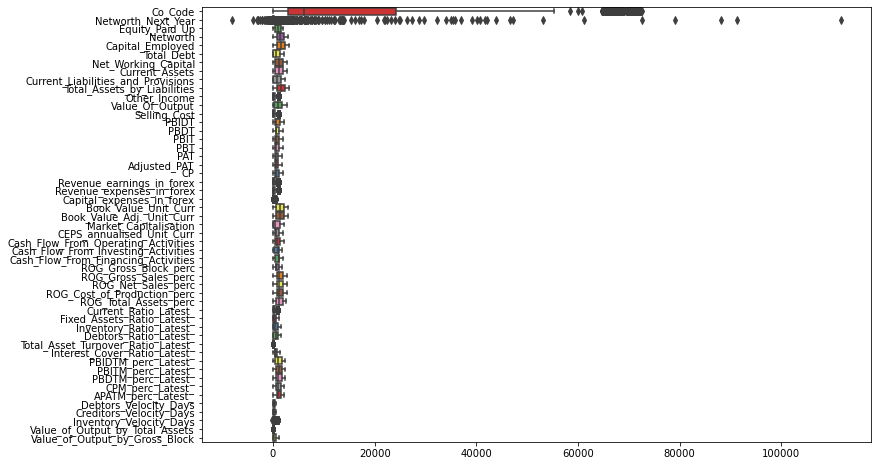

In [225]:
plt.figure(figsize=(12,8))
sns.boxplot(data=Company, orient="h", palette="Set1")


In [226]:
Q1 = Company.quantile(0.25) 
Q3 = Company.quantile(0.75) 
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR 
LL = Q1 - 1.5*IQR


In [227]:
((Company> UL)|(Company< LL)).sum()

Co_Code                                291
Networth_Next_Year                     676
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_by_Liabilities              0
Other_Income                            79
Value_Of_Output                          0
Selling_Cost                           168
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP                                       0
Revenue_earnings_in_forex              418
Revenue_expenses_in_forex              278
Capital_expenses_in_forex              694
Book_Value_

In [228]:
Company[((Company> UL) | (Company< LL))]= np.nan

1.2 Missing Value Treatment

In [229]:
Company.isnull().sum()

Co_Code                                291
Networth_Next_Year                     676
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_by_Liabilities              0
Other_Income                            79
Value_Of_Output                          0
Selling_Cost                           168
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP                                       0
Revenue_earnings_in_forex              418
Revenue_expenses_in_forex              278
Capital_expenses_in_forex              694
Book_Value_

In [230]:
Company.isnull().sum().sum()
print("Number of missing values after replacing outliers with Nan values is",Company.isnull().sum().sum())


Number of missing values after replacing outliers with Nan values is 3481


In [231]:
Company.shape

(3586, 51)

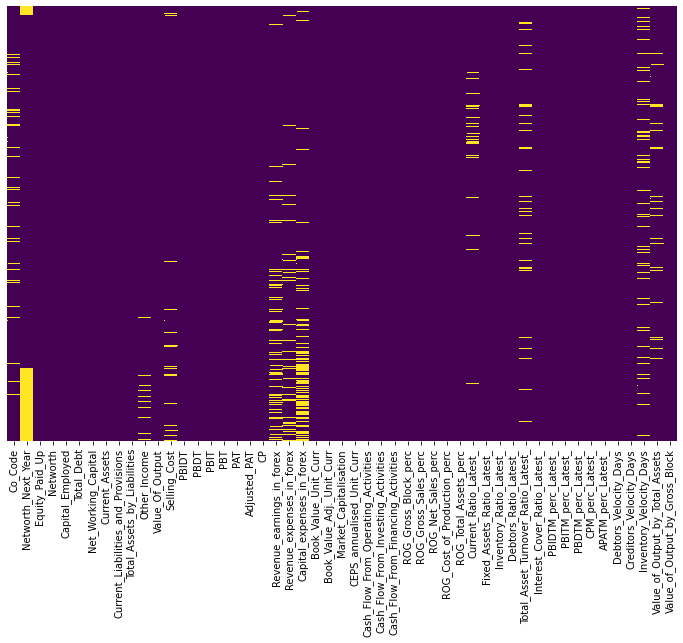

In [232]:
plt.figure(figsize = (12,8))
sns.heatmap(Company.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.show()


In [233]:
Company_temp = Company[Company.isnull().sum(axis = 1) <= 5]

In [234]:
Company_temp.shape

(3584, 51)

In [235]:
Company.isnull().sum().sort_values(ascending = False)/Company.index.size

Capital_expenses_in_forex             0.19
Networth_Next_Year                    0.19
Revenue_earnings_in_forex             0.12
Inventory_Velocity_Days               0.10
Co_Code                               0.08
Revenue_expenses_in_forex             0.08
Total_Asset_Turnover_Ratio_Latest_    0.06
Selling_Cost                          0.05
Current_Ratio_Latest_                 0.04
Value_of_Output_by_Total_Assets       0.04
Other_Income                          0.02
Current_Liabilities_and_Provisions    0.00
Total_Assets_by_Liabilities           0.00
Networth                              0.00
Value_Of_Output                       0.00
Current_Assets                        0.00
Total_Debt                            0.00
PBIDT                                 0.00
PBDT                                  0.00
PBIT                                  0.00
PBT                                   0.00
PAT                                   0.00
Adjusted_PAT                          0.00
CP         

In [236]:
predictors = Company.drop('Networth_Next_Year', axis = 1) 
response = Company['Networth_Next_Year']

In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [238]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
Company_imputed = pd.DataFrame(imputer.fit_transform(Company), columns = Company.columns)
Company_imputed.isnull().sum()


Co_Code                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_by_Liabilities            0
Other_Income                           0
Value_Of_Output                        0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Revenue_earnings_in_forex              0
Revenue_expenses_in_forex              0
Capital_expenses_in_forex              0
Book_Value_Unit_Curr                   0
Book_Value_Adj._

1.3 Transform Target variable into 0 and 1

In [239]:
Company_imputed['default'] = np.where((Company_imputed['Networth_Next_Year'] > 0), 0, 1)

In [240]:
Company_imputed[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,3.65
1,0,5.22
2,0,32.47
3,1,-24.03
4,1,-18.12
5,1,-6.58
6,0,7.64
7,0,6.10
8,1,-28.47
9,1,-1.13


In [241]:
Company_imputed['default'].value_counts()

0    3223
1     363
Name: default, dtype: int64

In [242]:
Company_imputed['default'].value_counts(normalize = True)

0   0.90
1   0.10
Name: default, dtype: float64

1.4 Univariate (4 marks) & Bivariate ( 6marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

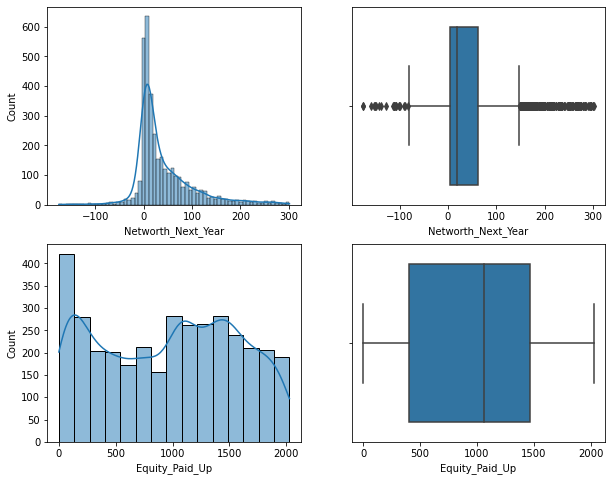

In [243]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(Company_imputed['Networth_Next_Year'], kde=True, ax=axes[0][0])
sns.boxplot(x='Networth_Next_Year', data=Company_imputed, ax=axes[0][1])
sns.histplot(Company_imputed['Equity_Paid_Up'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Equity_Paid_Up', data=Company_imputed , ax=axes[1][1])
plt.show()

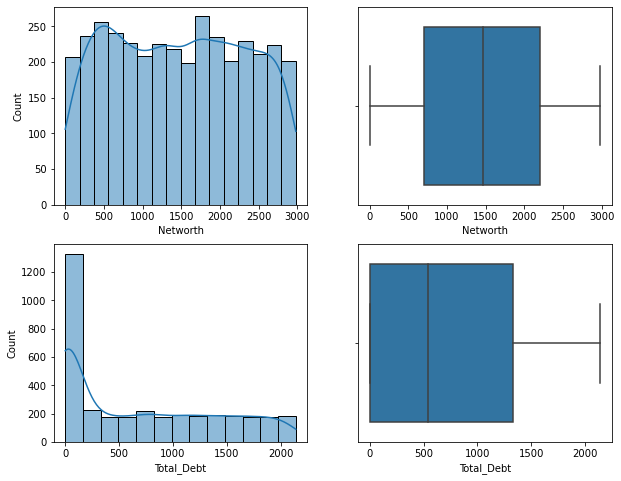

In [244]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(Company_imputed['Networth'], kde=True, ax=axes[0][0])
sns.boxplot(x='Networth', data=Company_imputed, ax=axes[0][1])
sns.histplot(Company_imputed['Total_Debt'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Total_Debt', data=Company_imputed , ax=axes[1][1])
plt.show()

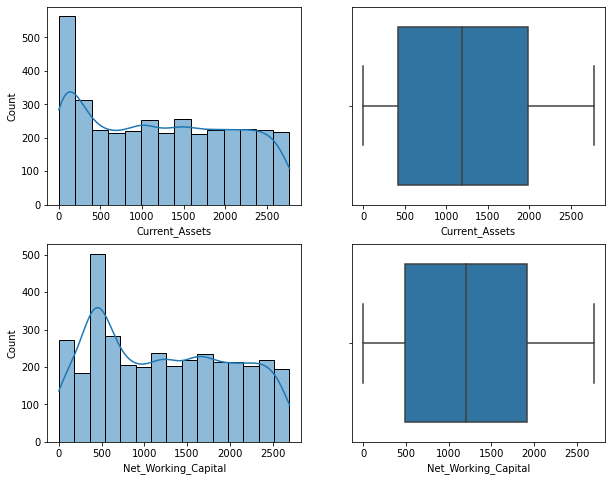

In [245]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(Company_imputed['Current_Assets'], kde=True, ax=axes[0][0])
sns.boxplot(x='Current_Assets', data=Company_imputed, ax=axes[0][1])
sns.histplot(Company_imputed['Net_Working_Capital'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Net_Working_Capital', data=Company_imputed , ax=axes[1][1])
plt.show()

In [246]:
Company_imputed.columns

Index(['Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up', 'Networth',
       'Capital_Employed', 'Total_Debt', 'Net_Working_Capital',
       'Current_Assets', 'Current_Liabilities_and_Provisions',
       'Total_Assets_by_Liabilities', 'Other_Income', 'Value_Of_Output',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Capital_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'Current_Ratio_Latest_', 'Fixed_Assets_Ratio_Latest_',
       'Inventory_Ratio_Latest_', 'Debtors_Ratio_Latest_',
       'Total_Asset_Turnover_Rat

Text(0, 0.5, 'Net_Sales_perc')

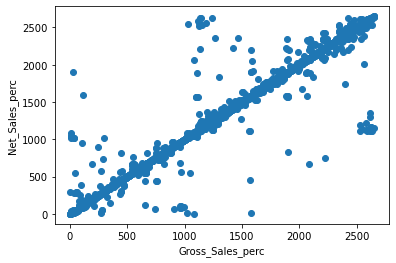

In [247]:
plt.scatter(Company_imputed['ROG_Gross_Sales_perc'],Company_imputed['ROG_Net_Sales_perc'])
plt.xlabel('Gross_Sales_perc')
plt.ylabel('Net_Sales_perc')

Text(0, 0.5, 'Networth')

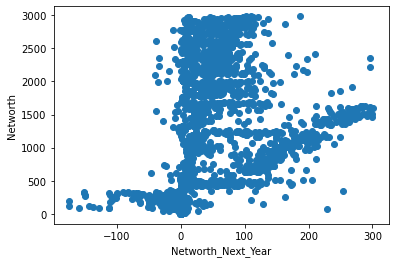

In [248]:
plt.scatter(Company_imputed['Networth_Next_Year'],Company_imputed['Networth'])
plt.xlabel('Networth_Next_Year')
plt.ylabel('Networth')

Text(0, 0.5, 'Selling_Cost')

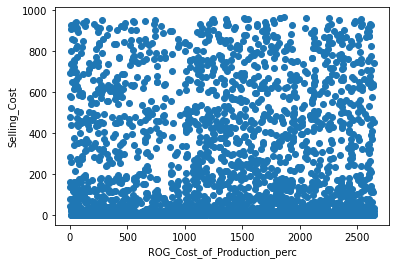

In [249]:
plt.scatter(Company_imputed['ROG_Cost_of_Production_perc'],Company_imputed['Selling_Cost'])
plt.xlabel('ROG_Cost_of_Production_perc')
plt.ylabel('Selling_Cost')

Text(0.5, 1.0, 'Figure: Countplot of Target Variable Default')

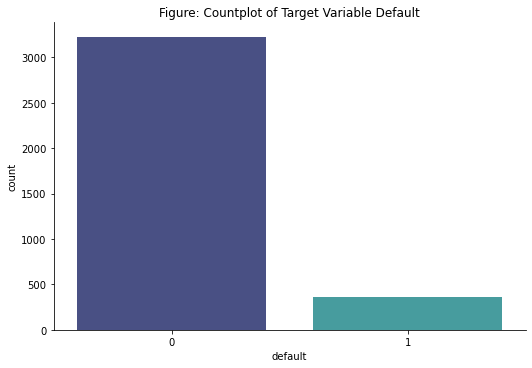

In [250]:
sns.catplot('default', data=Company_imputed, kind='count',aspect=1.5, palette='mako')
plt.title("Figure: Countplot of Target Variable Default")

In [251]:
Company_multiv=Company_imputed.copy()
Company_multiv.drop('default', axis = 1).corr()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
Co_Code,1.00,0.01,-0.07,0.06,0.03,-0.03,0.08,0.05,-0.04,0.02,...,0.04,0.04,0.02,0.03,0.03,-0.01,-0.03,-0.06,-0.05,0.07
Networth_Next_Year,0.01,1.00,0.03,0.16,0.09,0.11,0.24,0.12,0.25,0.06,...,0.17,0.22,0.21,0.24,0.23,0.14,0.16,0.14,0.18,0.10
Equity_Paid_Up,-0.07,0.03,1.00,0.08,0.10,0.07,0.07,0.07,0.04,0.07,...,-0.03,-0.02,-0.03,-0.03,-0.05,0.05,0.05,0.06,0.00,-0.00
Networth,0.06,0.16,0.08,1.00,0.43,0.02,0.27,0.20,0.05,0.21,...,0.17,0.16,0.15,0.16,0.13,0.11,0.12,0.08,0.09,0.14
Capital_Employed,0.03,0.09,0.10,0.43,1.00,0.08,0.21,0.27,0.04,0.57,...,0.10,0.12,0.11,0.12,0.08,0.10,0.10,0.07,0.11,0.11
Total_Debt,-0.03,0.11,0.07,0.02,0.08,1.00,0.20,0.24,0.33,0.00,...,0.06,0.06,0.01,0.02,-0.04,0.16,0.21,0.23,0.25,0.05
Net_Working_Capital,0.08,0.24,0.07,0.27,0.21,0.20,1.00,0.41,0.19,0.05,...,0.16,0.16,0.12,0.12,0.08,0.24,0.19,0.21,0.21,0.16
Current_Assets,0.05,0.12,0.07,0.20,0.27,0.24,0.41,1.00,0.23,0.19,...,0.06,0.07,0.05,0.07,0.03,0.21,0.18,0.18,0.19,0.11
Current_Liabilities_and_Provisions,-0.04,0.25,0.04,0.05,0.04,0.33,0.19,0.23,1.00,0.03,...,0.08,0.09,0.04,0.06,0.03,0.25,0.29,0.23,0.30,0.10
Total_Assets_by_Liabilities,0.02,0.06,0.07,0.21,0.57,0.00,0.05,0.19,0.03,1.00,...,0.04,0.07,0.05,0.05,0.03,0.09,0.08,0.04,0.05,0.06


<AxesSubplot:>

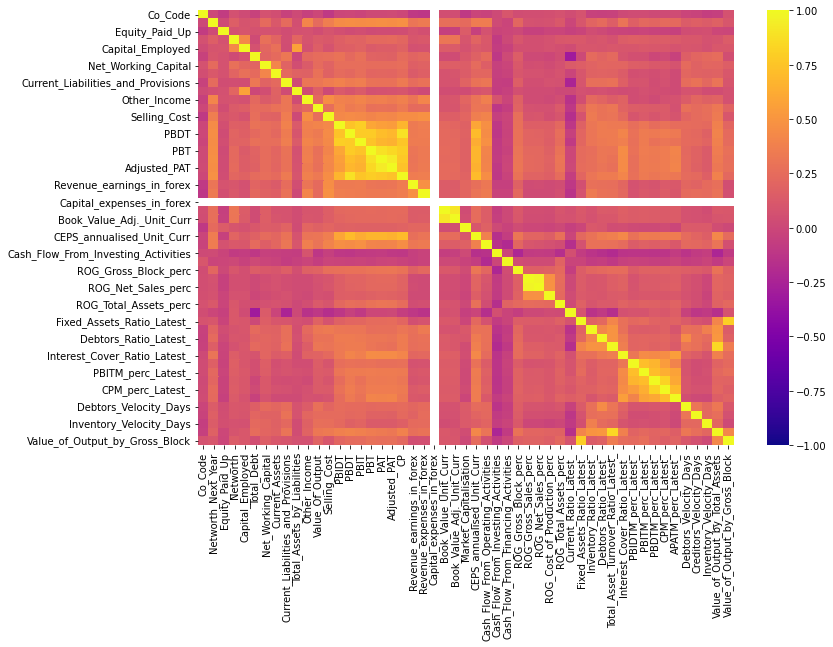

In [252]:
plt.figure(figsize = (12,8))
cor_matrix = Company_multiv.drop('default', axis = 1).corr() 
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)


1.5 Train Test Split

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [254]:
predictors = Company_imputed.drop(['default','Networth_Next_Year'],axis=1)
response = Company_imputed[['default']]

In [255]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [256]:
X_train.head()

,Co_Code,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Other_Income,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
662,5271.00,1058.00,1302.00,1197.00,2.00,566.00,232.00,4.00,1129.00,8.00,...,245.00,394.00,344.00,303.00,509.00,296.00,0.00,3.00,0.10,42.00
1373,5723.00,739.00,2916.00,3008.00,2.00,1225.00,1026.00,39.00,322.00,48.00,...,987.00,1035.00,1121.00,991.00,1107.00,0.00,0.00,13.30,0.04,58.00
3268,27272.00,970.00,2740.00,1125.00,161.00,499.00,165.00,1402.00,1083.00,233.00,...,2173.00,1809.00,195.00,173.00,257.00,206.00,371.00,27.00,0.37,520.00
3246,737.00,1211.00,2413.00,308.00,128.00,2562.00,134.00,1456.00,1050.00,573.00,...,2022.00,1983.00,2055.00,1935.00,1910.00,425.00,304.00,0.00,0.01,23.00
1456,6863.50,765.00,2773.00,821.00,1751.00,2535.00,2699.00,90.00,811.00,19.00,...,1790.00,1493.00,1708.00,1448.00,946.00,0.00,164.00,56.00,1.49,941.00


In [257]:
y_train.head()

,default
662,0
1373,0
3268,0
3246,0
1456,0


In [258]:
Company_train = pd.concat([X_train,y_train], axis=1) 
Company_test = pd.concat([X_test,y_test], axis=1)

In [259]:
Company_train.to_csv('Company_train.csv',index=False) 
Company_test.to_csv('Company_test.csv',index=False)

In [260]:
Company_train["default"].value_counts()

0    2172
1     230
Name: default, dtype: int64

In [261]:
Company_train.default.sum() / len(Company_train.default)

0.09575353871773522

In [262]:
Company_train.columns

Index(['Co_Code', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Other_Income', 'Value_Of_Output', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'Current_Ratio_Latest_', 'Fixed_Assets_Ratio_Latest_',
       'Inventory_Ratio_Latest_', 'Debtors_Ratio_Latest_',
       'Total_Asset_Turnover_Ratio_Latest_', 'Interest

1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

MODEL 1

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame() 
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  
    return(vif)


In [264]:
calc_vif(X_train).sort_values(by='VIF', ascending = False)

,variables,VIF
31,ROG_Net_Sales_perc,80.59
30,ROG_Gross_Sales_perc,80.34
16,PAT,37.01
17,Adjusted_PAT,28.61
22,Book_Value_Unit_Curr,21.77
23,Book_Value_Adj._Unit_Curr,21.75
15,PBT,20.94
13,PBDT,20.72
18,CP,17.79
42,PBDTM_perc_Latest_,17.42


In [265]:
Company_imputed.columns

Index(['Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up', 'Networth',
       'Capital_Employed', 'Total_Debt', 'Net_Working_Capital',
       'Current_Assets', 'Current_Liabilities_and_Provisions',
       'Total_Assets_by_Liabilities', 'Other_Income', 'Value_Of_Output',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Capital_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'Current_Ratio_Latest_', 'Fixed_Assets_Ratio_Latest_',
       'Inventory_Ratio_Latest_', 'Debtors_Ratio_Latest_',
       'Total_Asset_Turnover_Rat

In [266]:
f_1 = 'default~  Revenue_earnings_in_forex+ Revenue_expenses_in_forex+ROG_Gross_Block_perc + Current_Ratio_Latest_+ Creditors_Velocity_Days + Inventory_Ratio_Latest_ + Inventory_Velocity_Days +Debtors_Velocity_Days + Debtors_Ratio_Latest_ +Cash_Flow_From_Financing_Activities  + Capital_expenses_in_forex + Equity_Paid_Up + Selling_Cost +Other_Income + Cash_Flow_From_Investing_Activities + Market_Capitalisation + Total_Debt'

In [267]:
model_1 = SM.logit(formula = f_1,data=Company_imputed).fit(method='bfgs')


         Current function value: 0.253512
         Iterations: 35
         Function evaluations: 55
         Gradient evaluations: 48


In [268]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3569
Method:                           MLE   Df Model:                           16
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.2266
Time:                        13:49:12   Log-Likelihood:                -909.10
converged:                      False   LL-Null:                       -1175.4
Covariance Type:            nonrobust   LLR p-value:                4.350e-103
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.6182      0.260     -2.377      0.017      -1.128      -0.108
Revenue_earnings_in_forex              -0.0006      0.000     -1.375      0.169      -0.002       0.000
Revenue_expenses_in_forex              -0.0004      0.000     -1.244      0.213      -0.001       0.000
ROG_Gross_Block_perc                   -0.0008      0.000     -4.870      0.000      -0.001      -0.000
Current_Ratio_Latest_                  -0.0090      0.001    -11.414      0.000      -0.011      -0.007
Creditors_Velocity_Days                 0.0004      0.000      0.969      0.333      -0.000       0.001
Inventory_Ratio_Latest_                -0.0002      0.000     -1.361      0.173      -0.001     9.3e-05
Inventory_Velocity_Days                 0.0012      0.001      0.950      0.342      -0.001       0.004
Debtors_Velocity_Days                -3.71e-05      0.000     -0.100      0.921      -0.001       0.001
Debtors_Ratio_Latest_                  -0.0006      0.000     -3.832      0.000      -0.001      -0.000
Cash_Flow_From_Financing_Activities    -0.0001      0.000     -1.109      0.267      -0.000    9.34e-05
Capital_expenses_in_forex                    0   2.07e+04          0      1.000   -4.05e+04    4.05e+04
Equity_Paid_Up                          0.0002      0.000      1.835      0.066   -1.26e-05       0.000
Selling_Cost                           -0.0006      0.000     -1.744      0.081      -0.001    6.87e-05
Other_Income                           -0.0006      0.000     -2.207      0.027      -0.001   -6.27e-05
Cash_Flow_From_Investing_Activities     0.0005      0.000      4.162      0.000       0.000       0.001
Market_Capitalisation                  -0.0002   9.52e-05     -2.522      0.012      -0.000   -5.36e-05
Total_Debt                              0.0005   9.14e-05      5.317      0.000       0.000       0.001
=======================================================================================================
"""

In [269]:
f_2 = 'default~ Revenue_expenses_in_forex+ROG_Gross_Block_perc + Current_Ratio_Latest_  + Debtors_Ratio_Latest_  +Other_Income + Cash_Flow_From_Investing_Activities + Market_Capitalisation + Total_Debt+Cash_Flow_From_Operating_Activities+Current_Assets+Debtors_Ratio_Latest_+Cash_Flow_From_Financing_Activities+Debtors_Velocity_Days+Value_Of_Output'

In [270]:
model_2= SM.logit(formula = f_2,data=Company_imputed).fit(method='bfgs')


         Current function value: 0.251115
         Iterations: 35
         Function evaluations: 53
         Gradient evaluations: 46


In [271]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3572
Method:                           MLE   Df Model:                           13
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.2339
Time:                        13:49:17   Log-Likelihood:                -900.50
converged:                      False   LL-Null:                       -1175.4
Covariance Type:            nonrobust   LLR p-value:                3.831e-109
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0270      0.257      0.105      0.917      -0.477       0.531
Revenue_expenses_in_forex              -0.0005      0.000     -1.585      0.113      -0.001       0.000
ROG_Gross_Block_perc                   -0.0008      0.000     -4.928      0.000      -0.001      -0.000
Current_Ratio_Latest_                  -0.0087      0.001    -11.283      0.000      -0.010      -0.007
Debtors_Ratio_Latest_                  -0.0006      0.000     -3.869      0.000      -0.001      -0.000
Other_Income                           -0.0004      0.000     -1.504      0.133      -0.001       0.000
Cash_Flow_From_Investing_Activities     0.0005      0.000      3.571      0.000       0.000       0.001
Market_Capitalisation                  -0.0002   9.52e-05     -1.791      0.073      -0.000     1.6e-05
Total_Debt                              0.0006   9.44e-05      6.380      0.000       0.000       0.001
Cash_Flow_From_Operating_Activities    -0.0004      0.000     -3.611      0.000      -0.001      -0.000
Current_Assets                         -0.0001   7.99e-05     -1.297      0.195      -0.000     5.3e-05
Cash_Flow_From_Financing_Activities    -0.0002      0.000     -1.990      0.047      -0.000   -3.39e-06
Debtors_Velocity_Days                   0.0004      0.000      1.042      0.297      -0.000       0.001
Value_Of_Output                        -0.0002   8.69e-05     -2.872      0.004      -0.000   -7.93e-05
=======================================================================================================
"""

In [272]:
f_3 = 'default~ ROG_Gross_Block_perc + Current_Ratio_Latest_  + Debtors_Ratio_Latest_+ Cash_Flow_From_Investing_Activities + Total_Debt+Cash_Flow_From_Operating_Activities+Debtors_Ratio_Latest_+Cash_Flow_From_Financing_Activities+Value_Of_Output'

In [273]:
model_3= SM.logit(formula = f_3,data=Company_imputed).fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.253102
         Iterations: 34
         Function evaluations: 55
         Gradient evaluations: 48


In [274]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3577
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.2278
Time:                        13:49:20   Log-Likelihood:                -907.62
converged:                       True   LL-Null:                       -1175.4
Covariance Type:            nonrobust   LLR p-value:                1.669e-110
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0876      0.250      0.351      0.726      -0.402       0.577
ROG_Gross_Block_perc                   -0.0008      0.000     -5.190      0.000      -0.001      -0.001
Current_Ratio_Latest_                  -0.0087      0.001    -11.432      0.000      -0.010      -0.007
Debtors_Ratio_Latest_                  -0.0006      0.000     -4.293      0.000      -0.001      -0.000
Cash_Flow_From_Investing_Activities     0.0004      0.000      3.087      0.002       0.000       0.001
Total_Debt                              0.0005      9e-05      5.850      0.000       0.000       0.001
Cash_Flow_From_Operating_Activities    -0.0006      0.000     -4.950      0.000      -0.001      -0.000
Cash_Flow_From_Financing_Activities    -0.0002      0.000     -2.195      0.028      -0.000   -2.62e-05
Value_Of_Output                        -0.0003    8.2e-05     -3.823      0.000      -0.000      -0.000
=======================================================================================================
"""

1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [309]:
y_prob_pred_train = model_3.predict(Company_train)
pd.DataFrame(y_prob_pred_train).head()


,0
662,0.00
1373,0.12
3268,0.07
3246,0.12
1456,0.02


In [310]:
y_prob_pred_test = model_3.predict(Company_test)
pd.DataFrame(y_prob_pred_test).head()


,0
3163,0.13
3133,0.15
937,0.09
196,0.10
2852,0.14


In [319]:
y_class_train=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5: a=1
    else:a=0 
    y_class_train.append(a)


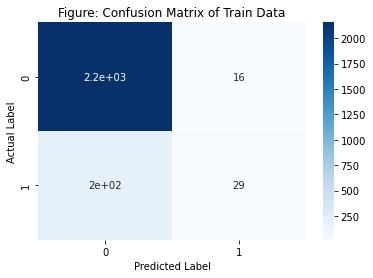

In [320]:
sns.heatmap((metrics.confusion_matrix(Company_train['default'],y_class_train)),annot=True,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label',rotation=90)
plt.title('Figure: Confusion Matrix of Train Data')
plt.show()


In [355]:
print(metrics.classification_report(Company_train['default'],y_class_train,digits=3))


              precision    recall  f1-score   support

           0      0.915     0.993     0.952      2172
           1      0.644     0.126     0.211       230

    accuracy                          0.910      2402
   macro avg      0.780     0.559     0.581      2402
weighted avg      0.889     0.910     0.881      2402



In [301]:
y_prob_pred_test = model_3.predict(Company_test)
pd.DataFrame(y_prob_pred_test).head()


,0
3163,0.13
3133,0.15
937,0.09
196,0.10
2852,0.14


In [302]:
y_class_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5: a=1
    else:a=0 
    y_class_test.append(a)


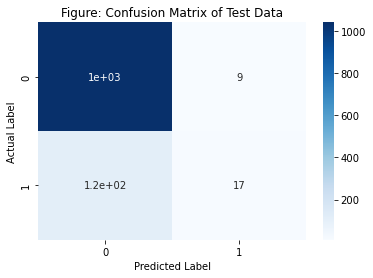

In [325]:
sns.heatmap((metrics.confusion_matrix(Company_test['default'],y_class_test)),annot=True,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label',rotation=90)
plt.title('Figure: Confusion Matrix of Test Data')
plt.show()

In [304]:
print(metrics.classification_report(Company_test['default'],y_class_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1051
           1       0.65      0.13      0.21       133

    accuracy                           0.89      1184
   macro avg       0.78      0.56      0.58      1184
weighted avg       0.87      0.89      0.86      1184



1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [82]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [84]:
# Random Forest Classifier
param_grid_rfcl = {
    'max_depth': [20,30,40],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}


In [85]:
rfcl = RandomForestClassifier(max_features='sqrt',n_estimators=50,n_jobs=-1,oob_score=True)
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid =param_grid_rfcl , cv = 5)
grid_search_rfcl.fit(X_train, y_train)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl  

{'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 25, 'min_samples_split': 50, 'n_estimators': 150}


RandomForestClassifier(max_depth=20, max_features=7, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=150, n_jobs=-1,
                       oob_score=True)

In [86]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [87]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,1.00,0.00
1,1.00,0.00
2,0.95,0.05
3,0.21,0.79
4,0.99,0.01


In [88]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                                     Imp
Networth                            0.25
Book_Value_Unit_Curr                0.23
Book_Value_Adj._Unit_Curr           0.22
Current_Ratio_Latest_               0.05
Capital_Employed                    0.04
PBIDT                               0.03
CEPS_annualised_Unit_Curr           0.02
PBDT                                0.02
Net_Working_Capital                 0.02
Total_Asset_Turnover_Ratio_Latest_  0.01
CP                                  0.01
PAT                                 0.01
PBITM_perc_Latest_                  0.01
PBT                                 0.01
Adjusted_PAT                        0.01
PBIDTM_perc_Latest_                 0.01
Total_Debt                          0.01
PBDTM_perc_Latest_                  0.01
PBIT                                0.00
CPM_perc_Latest_                    0.00
Interest_Cover_Ratio_Latest_        0.00
Co_Code                             0.00
APATM_perc_Latest_                  0.00
Current_Liabilit

In [89]:
confusion_matrix(y_train,ytrain_predict_rfcl)

array([[2141,   31],
       [  31,  199]], dtype=int64)

In [91]:
rf_train_acc=best_grid_rfcl.score(X_train,y_train) 
rf_train_acc

0.974188176519567

In [92]:
print(classification_report(y_train,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2172
           1       0.87      0.87      0.87       230

    accuracy                           0.97      2402
   macro avg       0.93      0.93      0.93      2402
weighted avg       0.97      0.97      0.97      2402



Area under Curve is 0.9932300424373448


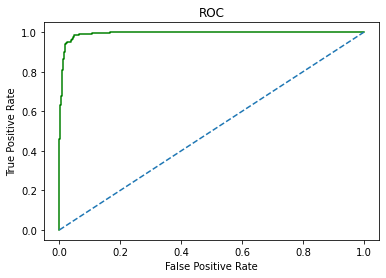

In [97]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [99]:
confusion_matrix(y_test,ytest_predict_rfcl)

array([[1032,   19],
       [  13,  120]], dtype=int64)

In [101]:
rf_test_acc=best_grid_rfcl.score(X_test,y_test)
rf_test_acc

0.972972972972973

In [103]:
print(classification_report(y_test,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1051
           1       0.86      0.90      0.88       133

    accuracy                           0.97      1184
   macro avg       0.93      0.94      0.93      1184
weighted avg       0.97      0.97      0.97      1184



Area under Curve is 0.9855132598384639


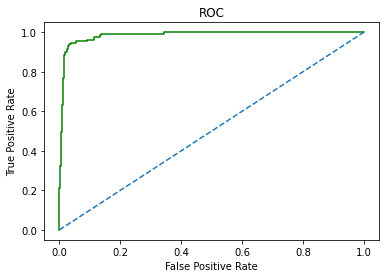

In [105]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [109]:
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train, y_train)
ldamodel

LinearDiscriminantAnalysis()

In [110]:
train_pred_lda=ldamodel.predict(X_train)
test_pred_lda =ldamodel.predict(X_test)

In [112]:
modelhol=Company_imputed.copy()
modelhol['predict_LDA_class']=ldamodel.predict(predictors)

In [113]:
print("Accuracy score  for LDA  train variables ")
ldamodel_train_score = ldamodel.score(X_train, y_train)
print(ldamodel_train_score)

print("Accuracy score for LDA test variables ")
ldamodel_test_score = ldamodel.score(X_test, y_test)
print(ldamodel_test_score)

Accuracy score  for LDA  train variables 
0.9612822647793505
Accuracy score for LDA test variables 
0.9569256756756757


 confusion matrix Train variables for LDA 


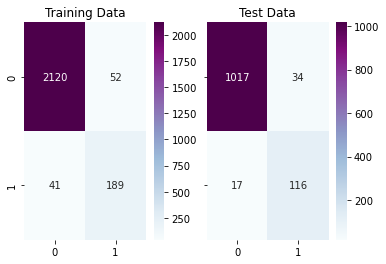

In [128]:
#LINEAR DISCRIMINANT ANALYSIS

print(" confusion matrix Train variables for LDA ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_lda)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_lda)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [115]:
print("LDA Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lda),'\n')


LDA Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2172
           1       0.78      0.82      0.80       230

    accuracy                           0.96      2402
   macro avg       0.88      0.90      0.89      2402
weighted avg       0.96      0.96      0.96      2402
 



AUC and ROC FOR LDA
AUC for the Training Data: 0.973


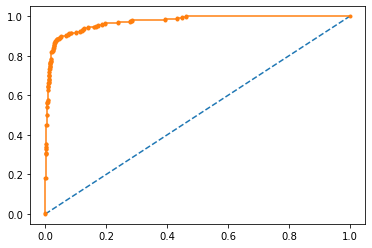

In [116]:
print("AUC and ROC FOR LDA")
lda_pred_prob_train = ldamodel.predict_proba(X_train)
lda_pred_prob_train=lda_pred_prob_train[:,1]

lda_pred_prob_test = ldamodel.predict_proba(X_test)
lda_pred_prob_test=lda_pred_prob_test[:,1]

#training data
#AUC
lda_train_auc = metrics.roc_auc_score(y_train,lda_pred_prob_train)
print('AUC for the Training Data: %.3f' % lda_train_auc)
#roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,lda_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [118]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lda),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1051
           1       0.77      0.87      0.82       133

    accuracy                           0.96      1184
   macro avg       0.88      0.92      0.90      1184
weighted avg       0.96      0.96      0.96      1184
 



AUC for the Test Data: 0.977


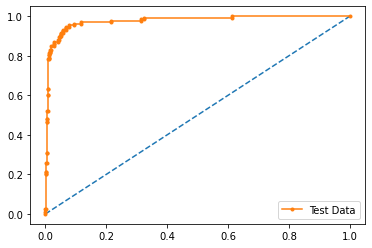

In [119]:
#test data
#AUC
lda_test_auc = metrics.roc_auc_score(y_test,lda_pred_prob_test)
print('AUC for the Test Data: %.3f' % lda_test_auc)
#roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,lda_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

In [340]:
cmetrics=classification_report(y_train, ytrain_predict_rfcl,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
rf_train_f1=round(Z.loc["0"][2],2)
rf_train_recall=round(Z.loc["0"][1],2)
rf_train_precision=round(Z.loc["0"][0],2)
Z

,precision,recall,f1-score,support
0,0.99,0.99,0.99,2172.00
1,0.87,0.87,0.87,230.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.93,0.93,0.93,2402.00
weighted avg,0.97,0.97,0.97,2402.00


In [341]:
cmetrics=classification_report(y_test, ytest_predict_rfcl,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
rf_test_f1=round(Z.loc["0"][2],2)
rf_test_recall=round(Z.loc["0"][1],2)
rf_test_precision=round(Z.loc["0"][0],2)
Z

,precision,recall,f1-score,support
0,0.99,0.98,0.98,1051.00
1,0.86,0.90,0.88,133.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.93,0.94,0.93,1184.00
weighted avg,0.97,0.97,0.97,1184.00


In [358]:
cmetrics=metrics.classification_report(Company_train['default'],y_class_train,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(Z.loc["0"][2],2)
lg_train_recall=round(Z.loc["0"][1],2)
lg_train_precision=round(Z.loc["0"][0],2)
Z

,precision,recall,f1-score,support
0,0.91,0.99,0.95,2172.00
1,0.64,0.13,0.21,230.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.78,0.56,0.58,2402.00
weighted avg,0.89,0.91,0.88,2402.00


In [350]:
cmetrics=metrics.classification_report(Company_test['default'],y_class_test,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(Z.loc["0"][2],2)
lg_train_recall=round(Z.loc["0"][1],2)
lg_train_precision=round(Z.loc["0"][0],2)
Z

,precision,recall,f1-score,support
0,0.90,0.99,0.94,1051.00
1,0.65,0.13,0.21,133.00
accuracy,0.89,0.89,0.89,0.89
macro avg,0.78,0.56,0.58,1184.00
weighted avg,0.87,0.89,0.86,1184.00


In [345]:
cmetrics=classification_report(y_train,train_pred_lda,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(Z.loc["0"][2],2)
lda_train_recall=round(Z.loc["0"][1],2)
lda_train_precision=round(Z.loc["0"][0],2)
Z

,precision,recall,f1-score,support
0,0.98,0.98,0.98,2172.00
1,0.78,0.82,0.80,230.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.88,0.90,0.89,2402.00
weighted avg,0.96,0.96,0.96,2402.00


In [348]:
cmetrics=classification_report(y_test,test_pred_lda,output_dict=True)
Z=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(Z.loc["0"][2],2)
lda_test_recall=round(Z.loc["0"][1],2)
lda_test_precision=round(Z.loc["0"][0],2)
Z

,precision,recall,f1-score,support
0,0.98,0.97,0.98,1051.00
1,0.77,0.87,0.82,133.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.88,0.92,0.90,1184.00
weighted avg,0.96,0.96,0.96,1184.00


In [411]:
index=['Accuracy', 'Recall','Precision','F1 Score']
new_co = pd.DataFrame({'Logistic reg Train':['0.91',lg_train_recall,lg_train_precision,lg_train_f1],
        'Logistic reg Test':['0.89',lg_test_recall,lg_test_precision,lg_test_f1],
        'LDA Train':[ldamodel_train_score,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[ldamodel_test_score,lda_test_recall,lda_test_precision,lda_test_f1],
        'RFCL Train':[rf_train_acc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RFCL Test':[rf_test_acc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index)
new_co

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test,RFCL Train,RFCL Test
Accuracy,0.91,0.89,0.96,0.96,0.97,0.97
Recall,0.99,0.99,0.98,0.97,0.99,0.98
Precision,0.91,0.90,0.98,0.98,0.99,0.99
F1 Score,0.95,0.94,0.98,0.98,0.99,0.98
